In [ ]:
import glob
import random

from IPython.display import display
from PIL import Image

from viroc.dataset import dataset_path
from viroc.imaging import extract_bounding_box, visualize_bounding_box
from viroc.models import GOTOCRModel, YOLOModel


In [2]:
# dataset_path = dataset_path.parent / "ccpd_weather"
dataset_path = dataset_path.parent / "ccpd_base"

In [3]:
imgs = glob.glob(str(dataset_path / "*.jpg"))

In [4]:
model = YOLOModel()
ocr_model = GOTOCRModel()

/home/noah/.cache/kaggle/datasets/binh234/ccpd-preprocess/CCPD2019/ccpd_base/00824353448276-90_88-274,549_444,612-435,610_274,610_277,548_438,548-0_0_12_31_15_31_31-67-5.jpg


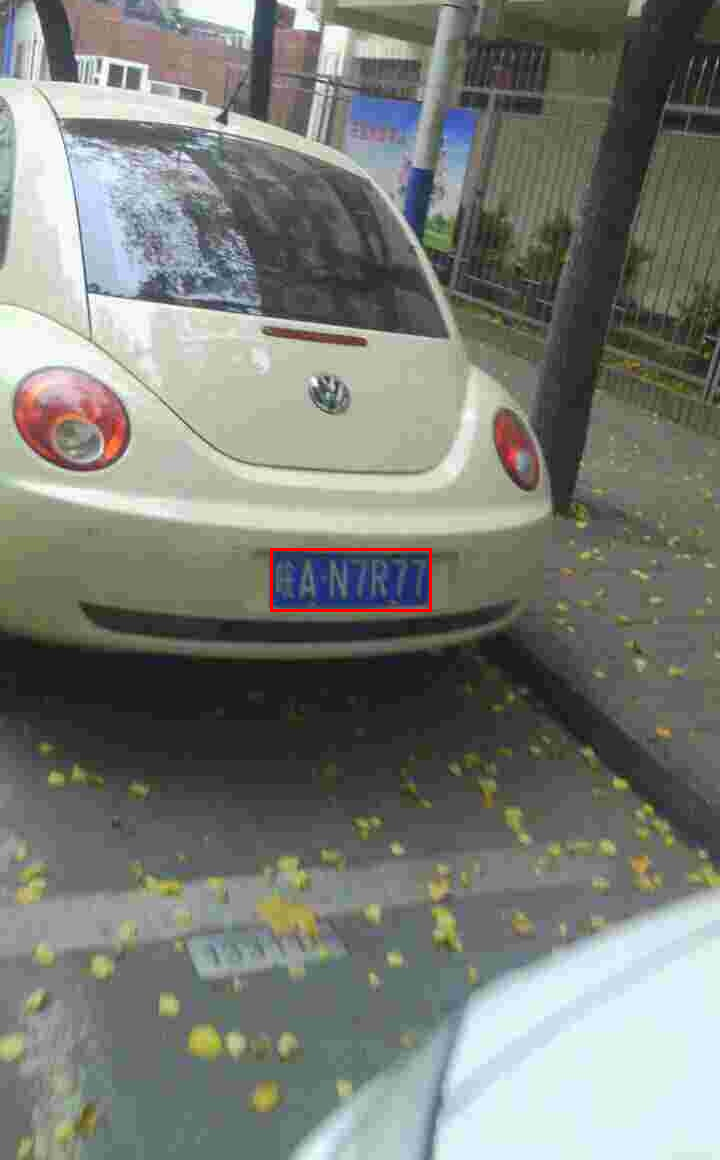

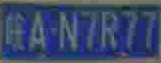

Generated text: CANTRI
/home/noah/.cache/kaggle/datasets/binh234/ccpd-preprocess/CCPD2019/ccpd_base/0304765325671-90_91-238,428_544,528-558,529_248,533_252,430_562,426-0_0_21_7_27_29_24-87-63.jpg


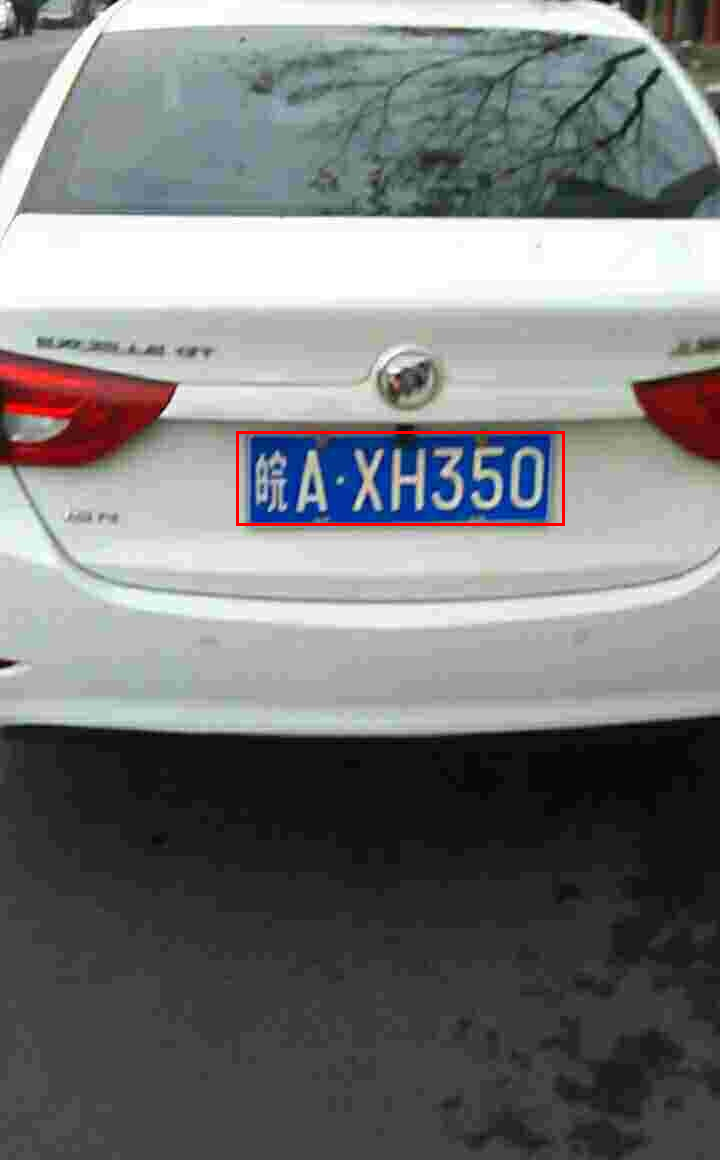

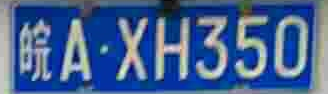

Generated text: 皖A·XH350
/home/noah/.cache/kaggle/datasets/binh234/ccpd-preprocess/CCPD2019/ccpd_base/0147725095786-91_84-264,424_481,504-469,507_273,502_274,436_470,441-0_0_18_27_33_29_18-83-25.jpg


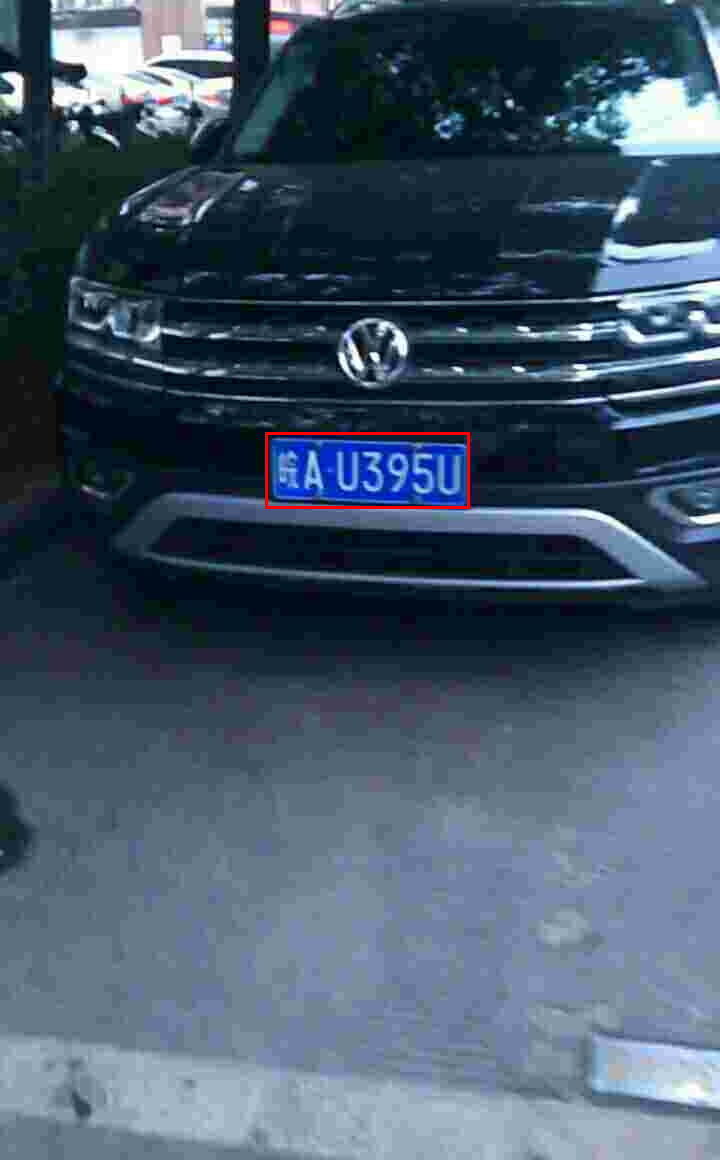

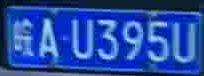

Generated text: 皖A·U395U
/home/noah/.cache/kaggle/datasets/binh234/ccpd-preprocess/CCPD2019/ccpd_base/0451795977012-96_83-252,478_600,623-598,630_249,581_255,480_604,529-0_16_18_16_32_33_33-96-95.jpg


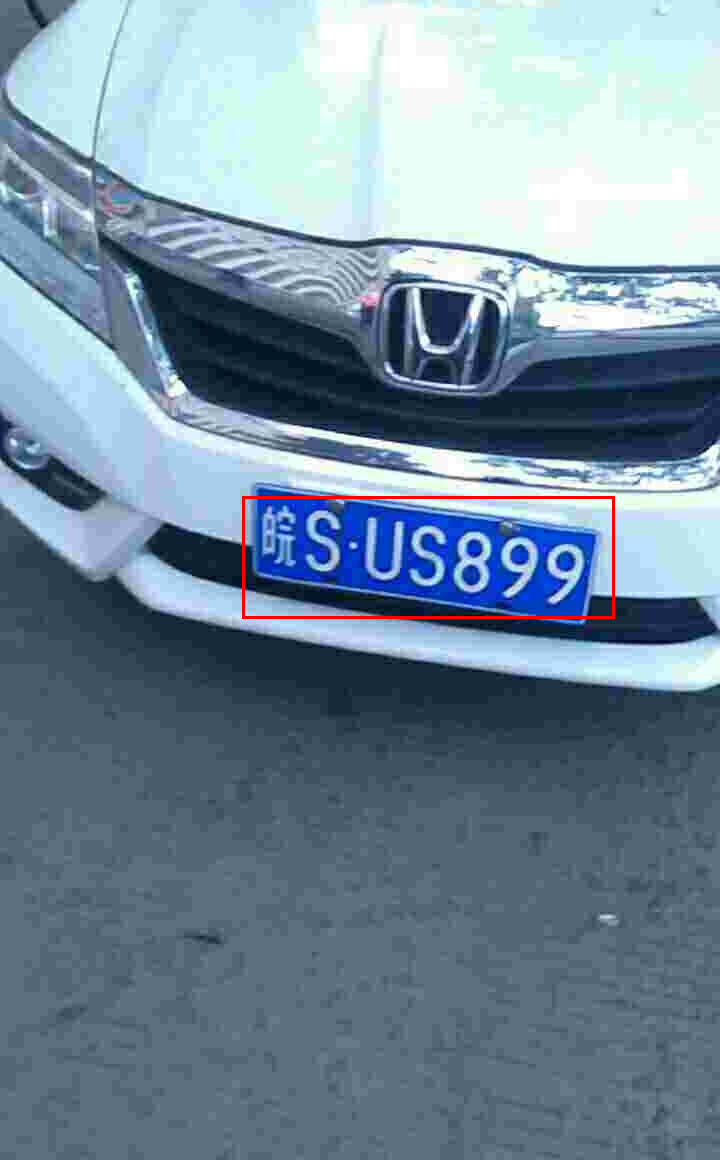

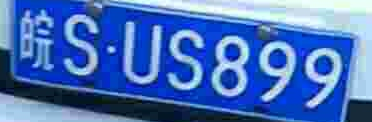

Generated text: 皖S·US899
/home/noah/.cache/kaggle/datasets/binh234/ccpd-preprocess/CCPD2019/ccpd_base/0188721264367-89_84-215,336_443,423-453,424_235,417_216,336_434,343-0_0_19_1_26_24_27-119-59.jpg


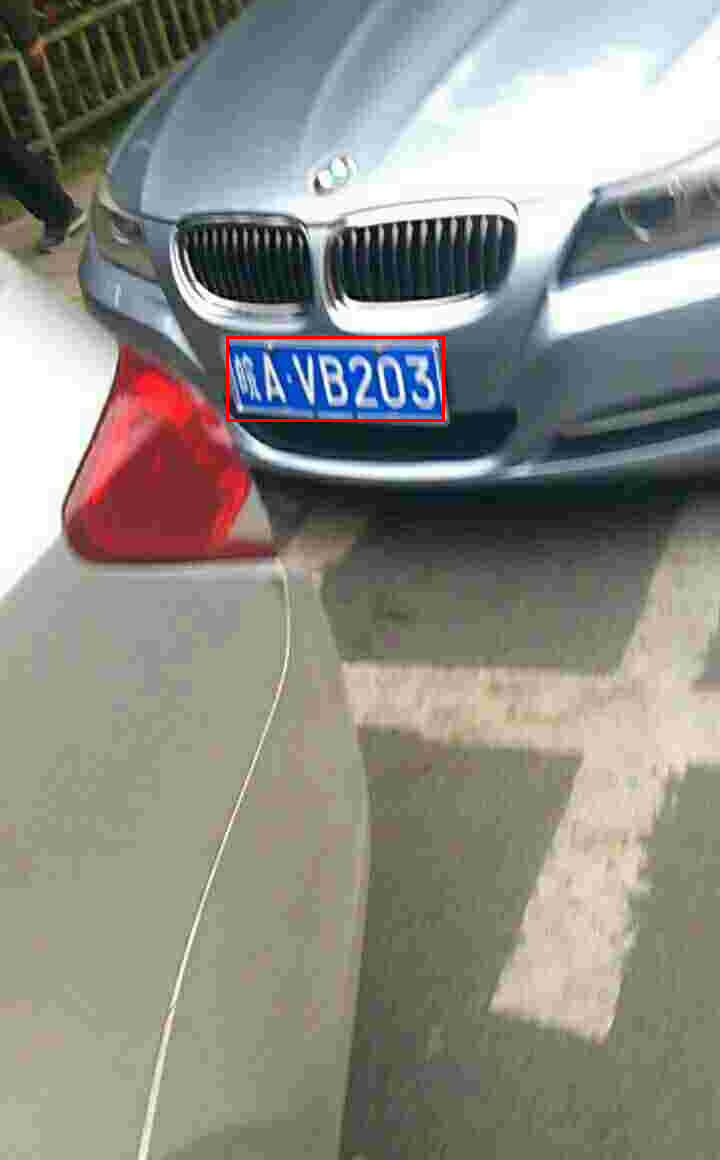

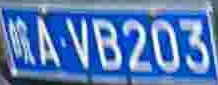

Generated text: 苏A·VB203


: 

In [ ]:
def ocr_demo(img_ind: int):
    img = imgs[img_ind]
    print(img)
    pil_image = Image.open(img)
    # display(pil_image)

    # get bounding box
    bb = model.get_bounding_box(pil_image)
    display(visualize_bounding_box(pil_image.copy(), bb))

    # extract plate from image
    plate = extract_bounding_box(pil_image, bb)
    display(plate)

    # run OCR on plate
    generated_text = ocr_model.predict(plate)
    print(f"Generated text: {generated_text}")


random_indices = random.sample(range(len(imgs)), 5)

for i in random_indices:
    ocr_demo(i)